In [34]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

dataset = pd.read_csv("/content/Regression.csv")

In [35]:
# Display the records of the dataset
dataset.head()

,Gender,Age,Smoker,BPMed,Stroke,Hypertension,Diabetes,Cholestrol,Systolic,Diastolic,BP,Heartrate,HeartProblem
0,1,1,0,0,0,0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,2,2,2,2,1,0
2,1,1,1,0,0,0,0,2,2,2,2,1,1
3,0,2,1,0,0,1,0,1,1,2,2,1,1
4,0,1,1,0,0,0,0,2,2,2,2,1,0


In [36]:
# Shape method will show us the dimension
# of the Dataset
print("Dataset Length = ", len(dataset))
print("Dataset Shape = ", dataset.shape)

Dataset Length =  4240
Dataset Shape =  (4240, 13)


In [37]:
# Data Processing
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 13
Float variables: 0


<Axes: >

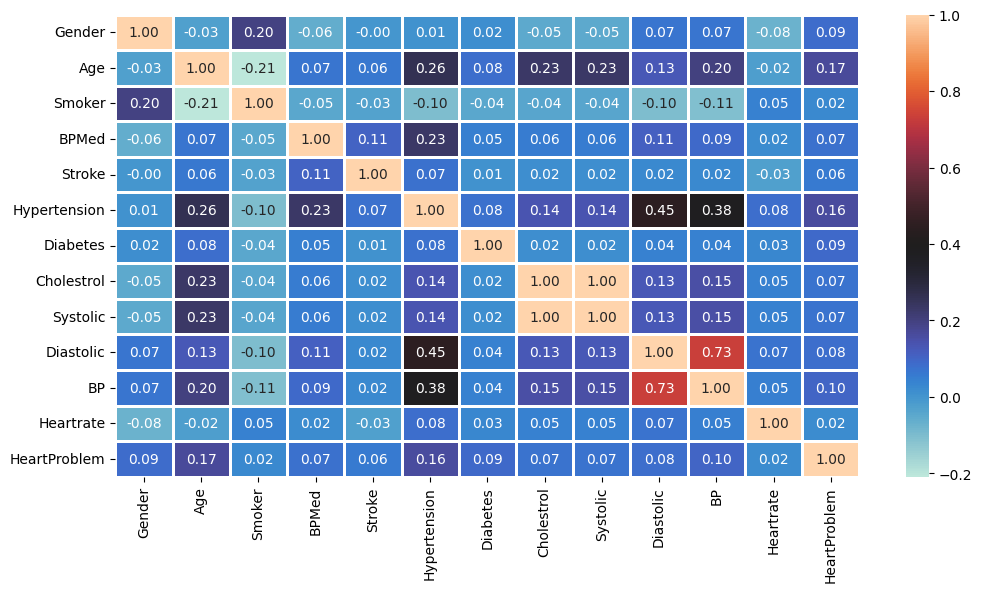

In [38]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'icefire',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**Replacing HeartProblem empty values with their mean values to make the data distribution symmetric.**

In [39]:
dataset['HeartProblem'] = dataset['HeartProblem'].fillna(
  dataset['HeartProblem'].mean())

**Drop records with null values (as the empty records are very less).**

In [40]:
new_dataset = dataset.dropna()

✅**Splitting Dataset into Training and Testing**

In [41]:
# Separating Target variables
X = dataset.values[:, 1:5]
y = dataset.values[:, 0]

# To divide data into attributes and labels
#X = dataset.drop(['HeartProblem'], axis=1)
#y = dataset['HeartProblem']

X = dataset
y = dataset['HeartProblem']

# Split dataset into training set and testing set
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.30,random_state=100) # 70% training and 30% testing

**Linear Regression** : *Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.*

In [42]:
# Fitting multiple Linear Regression to the training set 
model_LR = LinearRegression()
model_LR.fit(train_X, train_y)
y_pred = model_LR.predict(test_X)
print(y_pred)
#print(model_LR.score(test_X, test_y))

[1.00000000e+00 1.33361366e-15 1.00000000e+00 ... 1.00000000e+00
 1.00000000e+00 1.09634524e-15]


In [43]:
# Calculating the Coefficients
print(model_LR.coef_)

[-1.51309640e-16  8.04911693e-16  3.05311332e-16  9.71445147e-17
  5.62348562e-16  1.16226473e-16 -3.06612374e-16 -6.96310252e-02
  6.96310252e-02  2.49800181e-16 -2.91433544e-16  9.71445147e-17
  1.00000000e+00]


In [44]:
# Calculating the Intercept
print(model_LR.intercept_)

-5.273559366969494e-16


In [45]:
math.sqrt(mean_squared_error(test_y, y_pred))

1.0498525561104225e-15

In [46]:
# Calculating the R squared value
r2_score(test_y, y_pred)

1.0